# Experiment - Monte-Carlo Cross Validation

Author: Umberto Michelucci, 2022

Let suppose we want to do a linear regression (in one dimension) on a dataset. Let us try to see what slope of the fitted linear model we get by splitting the data in different ways.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Load the dataset (ingest)

In this notebook we will use the diabetes dataset.

The Diabetes dataset is a commonly used dataset for regression analysis. This dataset is publicly available and is frequently used for educational and benchmarking purposes in the field of data science and machine learning. Here is a detailed description:

### Overview
- The Diabetes dataset contains ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements taken from a group of diabetes patients.
- It is a standard dataset used for understanding and practicing regression techniques in machine learning.
- The dataset is relatively small, making it suitable for beginners and for testing algorithms quickly.

### Composition
- **Data Points**: It typically includes 442 patients' records.
- **Features**: There are a total of ten baseline variables, some of which are physiological and others are laboratory measurements.
- **Target Variable**: The quantitative measure of disease progression one year after baseline.
- **No Missing Values**: The dataset is clean and does not contain missing values, which simplifies preprocessing steps.

### Usage
- **Regression Analysis**: It is primarily used for regression tasks where the goal is to predict the disease progression based on the baseline measurements.
- **Benchmarking**: Due to its simplicity and well-understood characteristics, it's often used to benchmark performance of various regression algorithms.
- **Educational Tool**: The dataset is an excellent tool for teaching machine learning concepts, especially regression analysis.

### Format
- The dataset is available in multiple formats and can be easily loaded using popular data science libraries like scikit-learn in Python.

### Example of Loading in Python
```python
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
```

### Challenges
- Despite its simplicity, the dataset presents challenges like feature selection and understanding the impact of each feature on disease progression, making it a good starting point for practicing these skills.


In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(datasets.load_diabetes(return_X_y=False).DESCR)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

print(diabetes_X.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

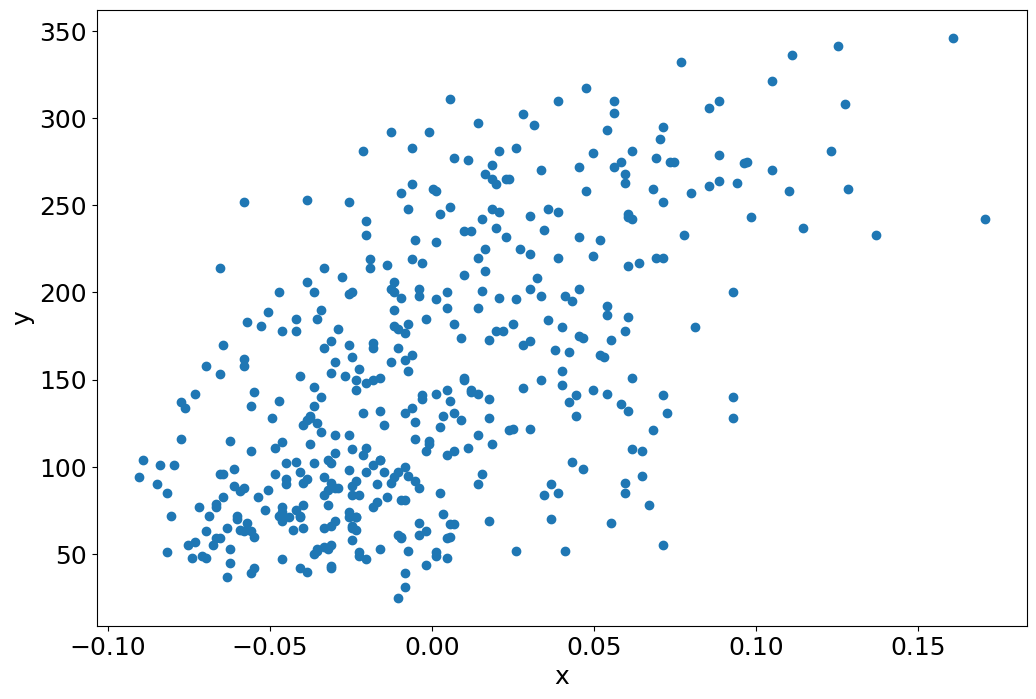

In [3]:
fig = plt.figure(figsize = (12,8))
plt.scatter(diabetes_X, diabetes_y)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.show()

# Single Dataset Split

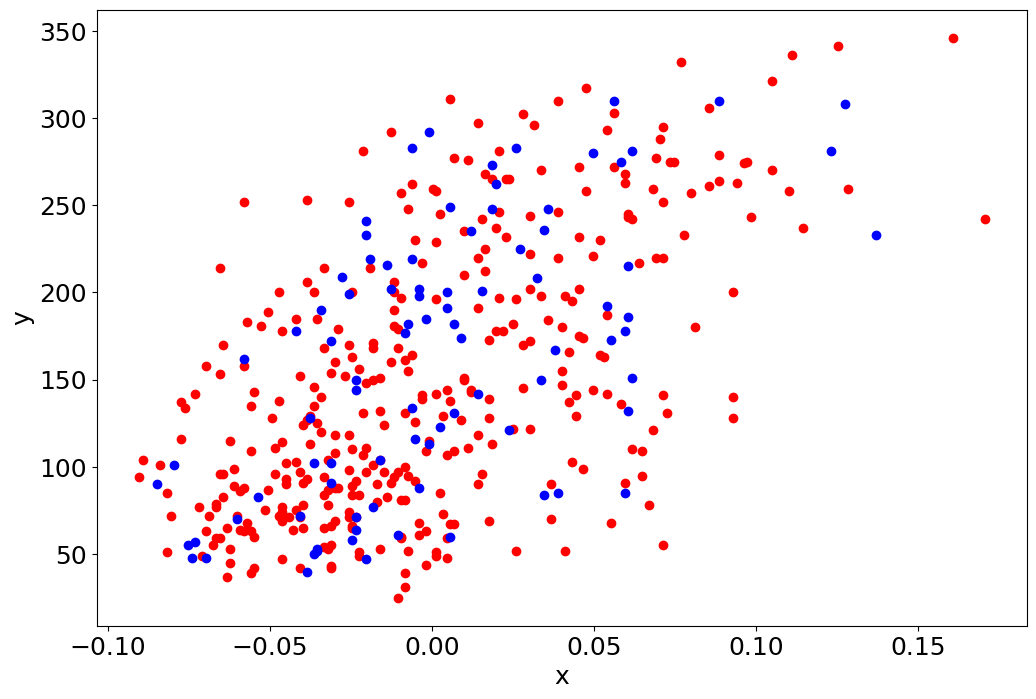

In [4]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, 
                                                                                        diabetes_y, test_size=0.20, random_state=41)

fig = plt.figure(figsize = (12,8))
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'red')
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'blue')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.show()

# Monte-Carlo Cross Validation

In [8]:
coefficients = []
mse = []

for i in range(1000):

    diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=i)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)
    
    coefficients.append(regr.coef_[0])
    mse.append(mean_squared_error(diabetes_y_test, diabetes_y_pred))
    

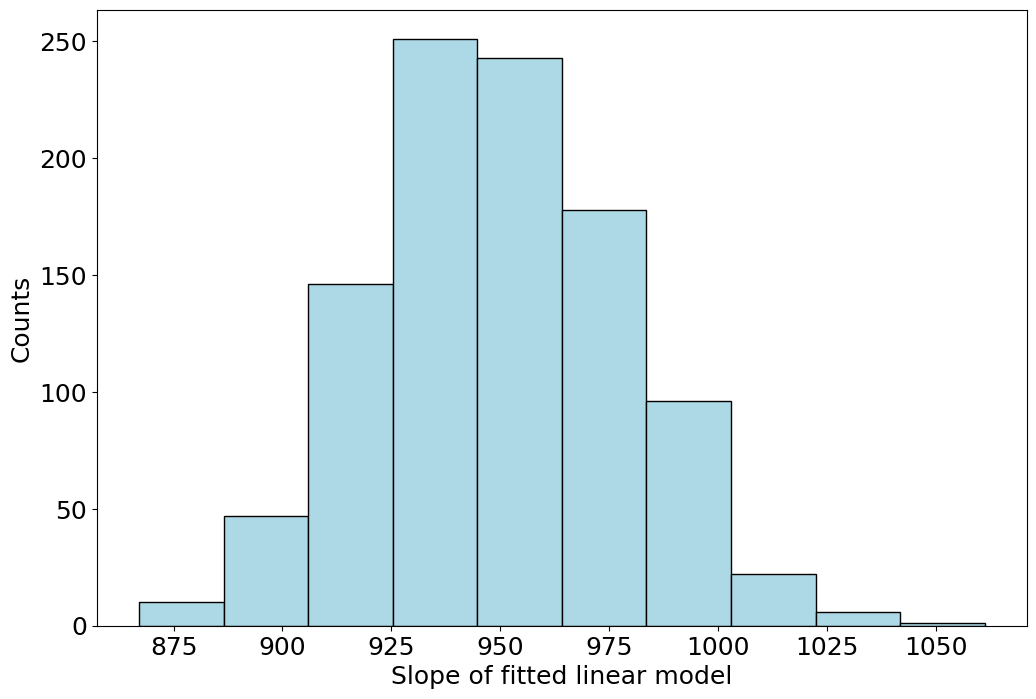

In [9]:
#plt.hist(coefficients, bins = 20)
fig = plt.figure(figsize= (12,8))
plt.hist(coefficients, bins=10, color = 'lightblue',edgecolor='black')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.xlabel('Slope of fitted linear model', fontsize = 18)
plt.show()

In [10]:
print(np.mean(coefficients))
print(np.std(coefficients))

949.3401459033588
28.404976633092158


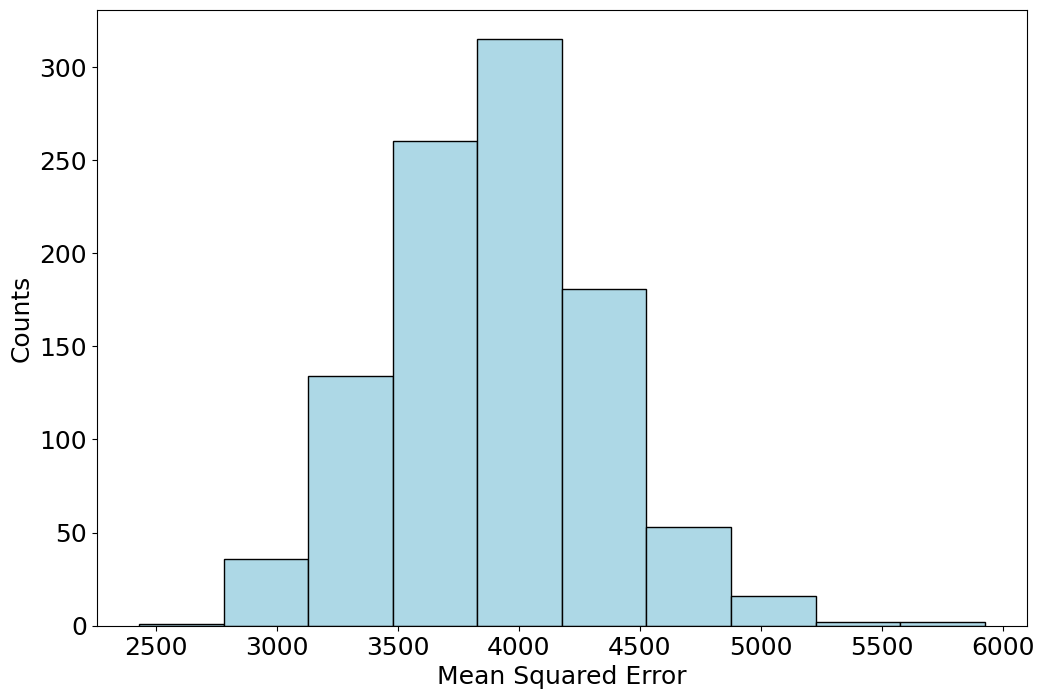

In [11]:
#plt.hist(coefficients, bins = 20)
fig = plt.figure(figsize= (12,8))
plt.hist(mse, bins=10, color = 'lightblue',edgecolor='black')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.xlabel('Mean Squared Error', fontsize = 18)
plt.show()

In [12]:
print(np.mean(mse))
print(np.std(mse))

3904.3931122122035
442.59054403436727
